In [1]:
############################################################
# Ramon Perez                                              #
# 05 May 2019                                              #
# Classifying buildings in NYC                             #
############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

% matplotlib inline

train_file = '.../train.csv'
test_file = '.../test.csv'

In [2]:
# Load training set and explore content
df_train = pd.read_csv(train_file, low_memory=False, na_values = [''])
df_train.head()

index borough  block   lot  schooldist  council  zipcode firecomp  \
0  574546      BX   3717    64         8.0     18.0  10472.0     E096   
1   12600      QN  15818    48        27.0     31.0  11691.0     E264   
2  235922      BK   6787     7        22.0     48.0  11229.0     E276   
3  202581      BK    672    30        15.0     38.0  11232.0     E228   
4  155971      BK   6651  7501        21.0     44.0  11223.0     E330   

   policeprct  healthcenterdistrict  healtharea  sanitboro  sanitdistrict  \
0        43.0                  26.0      3020.0        2.0            9.0   
1       101.0                  45.0      3800.0        4.0           14.0   
2        61.0                  35.0      7320.0        3.0           15.0   
3        72.0                  39.0      4400.0        3.0            7.0   
4        62.0                  37.0      8522.0        6.0           11.0   

  sanitsub zonedist1 zonedist2 zonedist3 zonedist4 overlay1 overlay2 spdist1  \
0       1A        R6       NaN       NaN       NaN      NaN      NaN     NaN   
1       2D      R4-1       NaN       NaN       NaN      NaN      NaN     NaN   
2       2D      R3-2       NaN       NaN       NaN      NaN      NaN     NaN   
3       2D     M1-2D       NaN       NaN       NaN      NaN      NaN     NaN   
4      NaN       R7A       NaN       NaN       NaN      NaN      NaN     NaN   

  spdist2  spdist3 ltdheight splitzone  landuse  easements  lotarea  bldgarea  \
0     NaN      NaN       NaN         N      1.0          0     2500      1540   
1     NaN      NaN       NaN         N      1.0          0     1225       594   
2     NaN      NaN       NaN         N      1.0          0     4200      2889   
3     NaN      NaN       NaN         N      2.0          0     1669      2070   
4     NaN      NaN       NaN         N      4.0          1     4000     14369   

   comarea  resarea  officearea  retailarea  garagearea  strgearea  \
0        0     1540           0           0           0          0   
1        0      594           0           0           0          0   
2        0     2889           0           0           0          0   
3        0     1380           0           0           0          0   
4     2844    11525        2844           0           0          0   

   factryarea  otherarea  numbldgs  numfloors  unitstotal  lotfront  lotdepth  \
0           0          0         1        2.0           1     25.00    100.00   
1           0          0         1        1.0           1     25.00     49.00   
2           0          0         2        2.0           2     42.00    100.00   
3           0          0         1        2.0           3     16.67    100.17   
4           0          0         1        7.0          14      0.09    100.00   

   bldgfront  bldgdepth  ext  proxcode irrlotcode  lottype  bsmtcode  \
0      20.00       36.0    E       2.0          N      5.0       2.0   
1      18.00       33.0  NaN       1.0          N      5.0       0.0   
2      27.00       57.0  NaN       1.0          N      5.0       2.0   
3      16.67       41.0  NaN       3.0          N      5.0       1.0   
4      40.00       70.0  NaN       1.0          N      5.0       5.0   

   assessland  assesstot  exemptland  exempttot  yearbuilt  yearalter1  \
0        6532      19280           0          0       1940           0   
1        1621       4178           0          0       1930           0   
2       20300      57028        1470       1470       1930           0   
3        2861      20242           0          0       1910           0   
4       90001    1368456           0     356862       2002           0   

   yearalter2 histdist landmark  builtfar  tract2010     xcoord    ycoord  \
0           0      NaN      NaN      0.62         48  1018914.0  239801.0   
1           0      NaN      NaN      0.48      99802  1051073.0  155952.0   
2           0      NaN      NaN      0.69        548   998378.0  161944.0   
3           0      NaN      NaN      1.2

In [3]:
# Load test set and explore content
df_test = pd.read_csv(test_file, low_memory=False, na_values = [''])
df_test.head()

index borough  block  lot  schooldist  council  zipcode firecomp  \
0  432027      BK   3361   34        32.0     37.0  11221.0     L112   
1   97433      QN    654   17        30.0     22.0  11103.0     L117   
2  408327      QN   3811   12        24.0     30.0  11385.0     E319   
3  365188      QN  10988   17        29.0     27.0  11412.0     L150   
4  856787      BK   2619   36        14.0     33.0  11222.0     L106   

   policeprct  healthcenterdistrict  healtharea  sanitboro  sanitdistrict  \
0        83.0                  34.0      3400.0        3.0            4.0   
1       114.0                  41.0       510.0        4.0            1.0   
2       104.0                  46.0      1810.0        4.0            5.0   
3       113.0                  44.0      3520.0        4.0           12.0   
4        94.0                  30.0       100.0        3.0            1.0   

  sanitsub zonedist1 zonedist2 zonedist3 zonedist4 overlay1 overlay2 spdist1  \
0       2B        R6       NaN       NaN       NaN      NaN      NaN     NaN   
1       4E       R6B       NaN       NaN       NaN      NaN      NaN     NaN   
2       4E      R4-1       NaN       NaN       NaN      NaN      NaN     NaN   
3       4E       R3A       NaN       NaN       NaN      NaN      NaN     NaN   
4       1A       R6B       NaN       NaN       NaN      NaN      NaN     NaN   

  spdist2  spdist3 ltdheight splitzone  landuse  easements  lotarea  bldgarea  \
0     NaN      NaN       NaN         N      2.0          0     1958      3789   
1     NaN      NaN       NaN         N      2.0          0     2396      3200   
2     NaN      NaN       NaN         N      1.0          0     1858      1248   
3     NaN      NaN       NaN         N      1.0          0     2700      1648   
4     NaN      NaN       NaN         N      1.0          0     1333      2298   

   comarea  resarea  officearea  retailarea  garagearea  strgearea  \
0        0     3789           0           0           0          0   
1        0     3200           0           0           0          0   
2        0     1248           0           0           0          0   
3        0     1648           0           0           0          0   
4        0     1532           0           0           0          0   

   factryarea  otherarea  numbldgs  numfloors  unitstotal  lotfront  lotdepth  \
0           0          0         1        3.0           6     19.58    100.00   
1           0          0         1        2.0           3     25.00     95.83   
2           0          0         2        2.0           1     18.58    100.00   
3           0          0         2        2.5           1     27.00    100.00   
4           0          0         1        2.0           2     16.67     80.00   

   bldgfront  bldgdepth  ext  proxcode irrlotcode  lottype  bsmtcode  \
0      19.58       45.0  NaN       0.0          N      5.0       5.0   
1      25.00       64.0  NaN       3.0          N      5.0       2.0   
2      16.00       36.0    G       2.0          N      5.0       2.0   
3      16.00       36.0    G       1.0          N      5.0       2.0   
4      16.67       40.0  NaN       3.0          N      5.0       1.0   

   assessland  assesstot  exemptland  exempttot  yearbuilt  yearalter1  \
0         878      45962           0          0       1931        2015   
1        5700      37203           0          0       1931           0   
2        8652      24004        1470       1470       1925           0   
3        9480      21626           0          0       1920           0   
4        2846      24616           0          0       1899           0   

   yearalter2 histdist landmark  builtfar  tract2010     xcoord    ycoord  \
0           0      NaN      NaN      1.94        435  1008377.0  192685.0   
1           0      NaN      NaN      1.34        143  1008289.0  218741.0   
2           0      NaN      NaN      0.67      63301  1018637.0  196297.0   
3           0      NaN      NaN      0.61     

In [4]:
# Double check that indexes are unique
df_train.index.is_unique, df_test.index.is_unique

(True, True)

In [5]:
# Assign a new name for the final data set to add labels add the end
final_test = df_test

In [6]:
# Set original index as the only one
df_train.set_index('index',inplace=True)
df_test.set_index('index',inplace=True)

In [7]:
# See that index is now unique
df_train.tail()

borough  block  lot  schooldist  council  zipcode firecomp  policeprct  \
index                                                                           
245102      QN  14142   29        27.0     32.0  11414.0     L173       106.0   
312077      BK   1439  157        16.0     41.0  11233.0     L176        73.0   
623749      QN   9441  148        28.0     28.0  11419.0     Q270       102.0   
202332      QN   3007   56        24.0     30.0  11379.0     E319       104.0   
460554      BK   4884   60        17.0     40.0  11226.0     E248        67.0   

        healthcenterdistrict  healtharea  sanitboro  sanitdistrict sanitsub  \
index                                                                         
245102                  45.0      3611.0        4.0           10.0       4D   
312077                  32.0      5200.0        3.0           16.0       1B   
623749                  45.0      3210.0        4.0            9.0       4E   
202332                  46.0      1822.0        4.0            5.0       5C   
460554                  35.0      5520.0        3.0           17.0       4B   

       zonedist1 zonedist2 zonedist3 zonedist4 overlay1 overlay2 spdist1  \
index                                                                      
245102      R3-2       NaN       NaN       NaN      NaN      NaN     NaN   
312077        R6       NaN       NaN       NaN      NaN      NaN     NaN   
623749       R4A       NaN       NaN       NaN      NaN      NaN     NaN   
202332       R4B       NaN       NaN       NaN      NaN      NaN     NaN   
460554        R6       NaN       NaN       NaN      NaN      NaN     NaN   

       spdist2  spdist3 ltdheight splitzone  landuse  easements  lotarea  \
index                                                                      
245102     NaN      NaN       NaN         N      1.0          0     5000   
312077     NaN      NaN       NaN         N      1.0          0     2144   
623749     NaN      NaN       NaN         N      1.0          0     1480   
202332     NaN      NaN       NaN         N      1.0          0     1800   
460554     NaN      NaN       NaN         N      4.0          0     2000   

        bldgarea  comarea  resarea  officearea  retailarea  garagearea  \
index                                                                    
245102      2056        0     2056           0           0           0   
312077      2551        0     2551           0           0           0   
623749      1355        0     1355           0           0           0   
202332      1224        0     1224           0           0           0   
460554      2800      700     2100           0         700           0   

        strgearea  factryarea  otherarea  numbldgs  numfloors  unitstotal  \
index                                                                       
245102          0           0          0         2        2.0           1   
312077          0           0          0         1        3.0           2   
623749          0           0          0         1        2.5           1   
202332          0           0          0         2        2.0           1   
460554          0           0          0         1        2.0           3   

        lotfront  lotdepth  bldgfront  bldgdepth  ext  proxcode irrlotcode  \
index                                                                        
245102     50.00     100.0       22.0      36.00    G       1.0          N   
312077     20.00     107.2       20.0      42.61  NaN       3.0          N   
623749     36.42      40.5       19.0      26.00  NaN       1.0          Y   
202332     18.00     100.0       18.0      34.00    G       3.0          N   
460554     20.00     100.0       20.0      70.00  NaN       0.0          N   

        lottype  bsmtcode  assessland  assesstot  exemptland  exempttot  \
index                                                                     
245102      5.0       2.0        6904      28941        3210   

In [8]:
# Examine boroughs before converting to dummies
df_train.borough.value_counts()

QN    259353
BK    221976
SI     99766
BX     71956
MN     34318
Name: borough, dtype: int64

In [10]:
# Make sure the feature only contains unique values
df_train['borough'].unique()

array(['BX', 'QN', 'BK', 'MN', 'SI'], dtype=object)

In [11]:
# Generate dummies and omit first one before analysis 
df_train = pd.get_dummies(df_train,
                          columns = ['borough'], 
                          prefix = 'B', # "B" for boroughs
                          drop_first=True) 

df_test = pd.get_dummies(df_test,
                         columns = ['borough'], 
                         prefix = 'B', # "B" for boroughs
                         drop_first=True)

In [12]:
# Identify columns with NULL values
# Check for missing values
# Useful columns with missing values are: schooldist, council, zipcode, policeprct, healthcenterdistrict, healtharea,
# landuse, proxcode, lottype, bsmtcode
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687369 entries, 574546 to 460554
Data columns (total 66 columns):
block                   687369 non-null int64
lot                     687369 non-null int64
schooldist              685166 non-null float64
council                 684952 non-null float64
zipcode                 684042 non-null float64
firecomp                684565 non-null object
policeprct              684997 non-null float64
healthcenterdistrict    685243 non-null float64
healtharea              684720 non-null float64
sanitboro               682276 non-null float64
sanitdistrict           682304 non-null float64
sanitsub                674668 non-null object
zonedist1               686563 non-null object
zonedist2               15888 non-null object
zonedist3               149 non-null object
zonedist4               11 non-null object
overlay1                59819 non-null object
overlay2                125 non-null object
spdist1                 81519 non-null objec

In [13]:
# Print columns select the most relevant for the analysis. Find more info in the dictionary.
# https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v1_1
df_train.columns, df_test.columns

(Index(['block', 'lot', 'schooldist', 'council', 'zipcode', 'firecomp',
        'policeprct', 'healthcenterdistrict', 'healtharea', 'sanitboro',
        'sanitdistrict', 'sanitsub', 'zonedist1', 'zonedist2', 'zonedist3',
        'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
        'ltdheight', 'splitzone', 'landuse', 'easements', 'lotarea', 'bldgarea',
        'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
        'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
        'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
        'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
        'assesstot', 'exemptland', 'exempttot', 'yearbuilt', 'yearalter1',
        'yearalter2', 'histdist', 'landmark', 'builtfar', 'tract2010', 'xcoord',
        'ycoord', 'zonemap', 'target__office', 'B_BX', 'B_MN', 'B_QN', 'B_SI'],
       dtype='object'),
 Index(['block', 'lot', 'schooldist', 'council', 'zipcode', 'fire

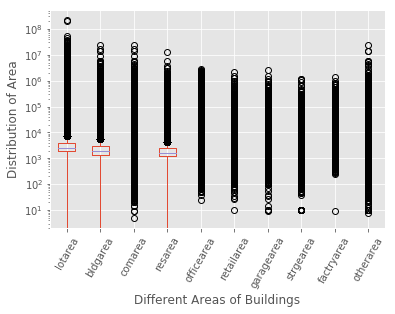

In [27]:
# Explore the distribution of some of the most relevant variables
df_train[['lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea', 
          'garagearea','strgearea', 'factryarea', 'otherarea']].boxplot()
plt.yscale('log')
plt.xlabel('Different Areas of Buildings')
plt.ylabel('Distribution of Area')
plt.xticks(rotation=60)
plt.show()

In [20]:
# Some shortcomings
# Max year is 2040; ranges of useful variables are very wide and some distributions are too skewed.
df_train.describe()

block            lot     schooldist        council  \
count  687369.000000  687369.000000  685166.000000  684952.000000   
mean     5306.386833     133.282655      22.017301      32.083971   
std      3697.284943     745.194383       7.992494      13.246678   
min         0.000000       1.000000       1.000000       1.000000   
25%      2312.000000      19.000000      17.000000      22.000000   
50%      4811.000000      38.000000      24.000000      32.000000   
75%      7457.000000      64.000000      29.000000      45.000000   
max     16350.000000    9978.000000      32.000000      51.000000   

             zipcode     policeprct  healthcenterdistrict     healtharea  \
count  684042.000000  684997.000000         685243.000000  684720.000000   
mean    11012.095503      86.907395             38.260461    3268.041369   
std       471.241680      29.396923              9.630510    2664.771896   
min     10001.000000       1.000000             11.000000     100.000000   
25%     10466.000000      66.000000             33.000000     920.000000   
50%     11221.000000     102.000000             41.000000    2710.000000   
75%     11369.000000     111.000000             45.000000    4700.000000   
max     12345.000000     123.000000             51.000000    9300.000000   

           sanitboro  sanitdistrict  spdist3        landuse      easements  \
count  682276.000000  682304.000000      0.0  685076.000000  687369.000000   
mean        3.459664       8.085740      NaN       2.158191       0.020992   
std         1.023931       4.956412      NaN       2.397397       0.432472   
min         1.000000       1.000000      NaN       1.000000       0.000000   
25%         3.000000       3.000000      NaN       1.000000       0.000000   
50%         4.000000       8.000000      NaN       1.000000       0.000000   
75%         4.000000      12.000000      NaN       2.000000       0.000000   
max         8.000000      95.000000      NaN      11.000000      28.000000   

            lotarea      bldgarea       comarea       resarea    officearea  \
count  6.873690e+05  6.873690e+05  6.873690e+05  6.873690e+05  6.873690e+05   
mean   8.121005e+03  6.392347e+03  2.138091e+03  4.023024e+03  7.670706e+02   
std    4.032899e+05  6.081982e+04  5.174471e+04  2.952860e+04  2.105098e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.000000e+03  1.372000e+03  0.000000e+00  1.194000e+03  0.000000e+00   
50%    2.512000e+03  2.000000e+03  0.000000e+00  1.644000e+03  0.000000e+00   
75%    4.000000e+03  3.000000e+03  0.000000e+00  2.400000e+03  0.000000e+00   
max    2.147557e+08  2.400000e+07  2.400000e+07  1.321140e+07  2.900000e+06   

         retailarea    garagearea     strgearea    factryarea     otherarea  \
count  6.873690e+05  6.873690e+05  6.873690e+05  6.873690e+05  6.873690e+05   
mean   3.241745e+02  1.427477e+02  1.157591e+02  1.387456e+02  6.212406e+02   
std    5.970228e+03  5.841677e+03  4.125780e+03  4.478039e+03  4.224443e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    2.192088e+06  2.677430e+06  1.197152e+06  1.324592e+06  2.400000e+07   

            numbldgs      numfloors     unitstotal       lotfront  \
count  687369.000000  687369.000000  687369.000000  687369.000000   
mean        1.280557       2.321231       4.537932      39.977191   
std         2.941959       1.989729      42.838521      74.997205   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       2.000000       1.000000      20.000000   
50%         1.000000       2.000000       2.000000      25.000000   
75%         2.000000       2.500000       2.000000      40.000000   
max      1850.000000     205.

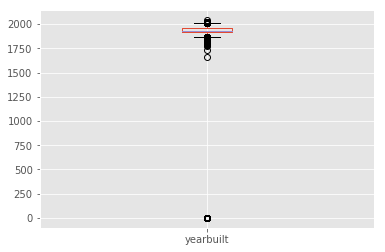

In [21]:
# The features yearbuilt, zipcode, and many others have too many missing values (0's)
df_train[['yearbuilt']].boxplot()
plt.show()

In [22]:
# Feature selection for analysis
# Training set
cols = ['block', 'lot', 'schooldist', 'council', 'zipcode', 'landuse', 'easements', 'lotarea', 'bldgarea', 'comarea',
        'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
        'unitstotal', 'lotfront', 'bldgfront', 'bldgdepth', 'proxcode', 'lottype', 'assessland', 'assesstot', 'builtfar', 
        'B_BX', 'B_MN', 'B_QN', 'B_SI', 'target__office']

df_train = df_train[cols]
df_train.head()

block   lot  schooldist  council  zipcode  landuse  easements  \
index                                                                   
574546   3717    64         8.0     18.0  10472.0      1.0          0   
12600   15818    48        27.0     31.0  11691.0      1.0          0   
235922   6787     7        22.0     48.0  11229.0      1.0          0   
202581    672    30        15.0     38.0  11232.0      2.0          0   
155971   6651  7501        21.0     44.0  11223.0      4.0          1   

        lotarea  bldgarea  comarea  resarea  officearea  retailarea  \
index                                                                 
574546     2500      1540        0     1540           0           0   
12600      1225       594        0      594           0           0   
235922     4200      2889        0     2889           0           0   
202581     1669      2070        0     1380           0           0   
155971     4000     14369     2844    11525        2844           0   

        garagearea  strgearea  factryarea  otherarea  numbldgs  numfloors  \
index                                                                       
574546           0          0           0          0         1        2.0   
12600            0          0           0          0         1        1.0   
235922           0          0           0          0         2        2.0   
202581           0          0           0          0         1        2.0   
155971           0          0           0          0         1        7.0   

        unitstotal  lotfront  bldgfront  bldgdepth  proxcode  lottype  \
index                                                                   
574546           1     25.00      20.00       36.0       2.0      5.0   
12600            1     25.00      18.00       33.0       1.0      5.0   
235922           2     42.00      27.00       57.0       1.0      5.0   
202581           3     16.67      16.67       41.0       3.0      5.0   
155971          14      0.09      40.00       70.0       1.0      5.0   

        assessland  assesstot  builtfar  B_BX  B_MN  B_QN  B_SI  \
index                                                             
574546        6532      19280      0.62     1     0     0     0   
12600         1621       4178      0.48     0     0     1     0   
235922       20300      57028      0.69     0     0     0     0   
202581        2861      20242      1.24     0     0     0     0   
155971       90001    1368456      3.59     0     0     0     0   

        target__office  
index                   
574546           False  
12600            False  
235922           False  
202581           False  
155971           False

In [23]:
# Testing set
cols_test = ['block', 'lot', 'schooldist', 'council', 'zipcode', 'landuse', 'easements', 'lotarea', 'bldgarea', 'comarea',
            'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea', 'otherarea', 'numbldgs', 'numfloors',
            'unitstotal', 'lotfront', 'bldgfront', 'bldgdepth', 'proxcode', 'lottype', 'assessland', 'assesstot', 'builtfar', 
            'B_BX', 'B_MN', 'B_QN', 'B_SI']

df_test = df_test[cols_test]
df_test.head()

block  lot  schooldist  council  zipcode  landuse  easements  lotarea  \
index                                                                           
432027   3361   34        32.0     37.0  11221.0      2.0          0     1958   
97433     654   17        30.0     22.0  11103.0      2.0          0     2396   
408327   3811   12        24.0     30.0  11385.0      1.0          0     1858   
365188  10988   17        29.0     27.0  11412.0      1.0          0     2700   
856787   2619   36        14.0     33.0  11222.0      1.0          0     1333   

        bldgarea  comarea  resarea  officearea  retailarea  garagearea  \
index                                                                    
432027      3789        0     3789           0           0           0   
97433       3200        0     3200           0           0           0   
408327      1248        0     1248           0           0           0   
365188      1648        0     1648           0           0           0   
856787      2298        0     1532           0           0           0   

        strgearea  factryarea  otherarea  numbldgs  numfloors  unitstotal  \
index                                                                       
432027          0           0          0         1        3.0           6   
97433           0           0          0         1        2.0           3   
408327          0           0          0         2        2.0           1   
365188          0           0          0         2        2.5           1   
856787          0           0          0         1        2.0           2   

        lotfront  bldgfront  bldgdepth  proxcode  lottype  assessland  \
index                                                                   
432027     19.58      19.58       45.0       0.0      5.0         878   
97433      25.00      25.00       64.0       3.0      5.0        5700   
408327     18.58      16.00       36.0       2.0      5.0        8652   
365188     27.00      16.00       36.0       1.0      5.0        9480   
856787     16.67      16.67       40.0       3.0      5.0        2846   

        assesstot  builtfar  B_BX  B_MN  B_QN  B_SI  
index                                                
432027      45962      1.94     0     0     0     0  
97433       37203      1.34     0     0     1     0  
408327      24004      0.67     0     0     1     0  
365188      21626      0.61     0     0     1     0  
856787      24616      1.72     0     0     0     0

In [24]:
# One less column for test. Where labes will be added later
print(df_train.shape), print(df_test.shape);

(687369, 33)
(171843, 32)


In [25]:
# Identify missing values
print(df_train.isnull().sum()), print(df_test.isnull().sum());

block                0
lot                  0
schooldist        2203
council           2417
zipcode           3327
landuse           2293
easements            0
lotarea              0
bldgarea             0
comarea              0
resarea              0
officearea           0
retailarea           0
garagearea           0
strgearea            0
factryarea           0
otherarea            0
numbldgs             0
numfloors            0
unitstotal           0
lotfront             0
bldgfront            0
bldgdepth            0
proxcode           397
lottype            397
assessland           0
assesstot            0
builtfar             0
B_BX                 0
B_MN                 0
B_QN                 0
B_SI                 0
target__office       0
dtype: int64
block           0
lot             0
schooldist    568
council       586
zipcode       827
landuse       565
easements       0
lotarea         0
bldgarea        0
comarea         0
resarea         0
officearea      0
retailarea  

In [26]:
# Dropping all missing values
train_clean = df_train.dropna(how='any')
test_clean = df_test.dropna(how='any')

In [27]:
print(train_clean.shape), print(test_clean.shape);

(681763, 33)
(170440, 32)


In [29]:
# True count of what the model needs to accurately predict during training
# 0.82% of the sample are office buildings
train_clean.target__office.value_counts()

False    676181
True       5582
Name: target__office, dtype: int64

In [30]:
train_clean.describe()

block            lot     schooldist        council  \
count  681763.000000  681763.000000  681763.000000  681763.000000   
mean     5305.685734     133.152641      22.021518      32.082486   
std      3694.689397     745.915767       7.989495      13.247585   
min         1.000000       1.000000       1.000000       1.000000   
25%      2307.000000      19.000000      17.000000      22.000000   
50%      4820.000000      38.000000      24.000000      32.000000   
75%      7455.000000      64.000000      29.000000      45.000000   
max     16350.000000    9978.000000      32.000000      51.000000   

             zipcode        landuse      easements       lotarea  \
count  681763.000000  681763.000000  681763.000000  6.817630e+05   
mean    11012.102440       2.122100       0.020821  7.348343e+03   
std       471.309035       2.342556       0.433475  3.086733e+05   
min     10001.000000       1.000000       0.000000  0.000000e+00   
25%     10466.000000       1.000000       0.000000  2.000000e+03   
50%     11221.000000       1.000000       0.000000  2.510000e+03   
75%     11370.000000       2.000000       0.000000  4.000000e+03   
max     12345.000000      11.000000      28.000000  2.147557e+08   

           bldgarea       comarea       resarea    officearea    retailarea  \
count  6.817630e+05  6.817630e+05  6.817630e+05  6.817630e+05  6.817630e+05   
mean   6.434660e+03  2.146838e+03  4.055544e+03  7.726094e+02  3.267243e+02   
std    6.103101e+04  5.191475e+04  2.964723e+04  2.113442e+04  5.994537e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.386000e+03  0.000000e+00  1.200000e+03  0.000000e+00  0.000000e+00   
50%    2.000000e+03  0.000000e+00  1.656000e+03  0.000000e+00  0.000000e+00   
75%    3.000000e+03  0.000000e+00  2.400000e+03  0.000000e+00  0.000000e+00   
max    2.400000e+07  2.400000e+07  1.321140e+07  2.900000e+06  2.192088e+06   

         garagearea     strgearea    factryarea     otherarea       numbldgs  \
count  6.817630e+05  6.817630e+05  6.817630e+05  6.817630e+05  681763.000000   
mean   1.437361e+02  1.156527e+02  1.396200e+02  6.199245e+02       1.288630   
std    5.865379e+03  4.077219e+03  4.494913e+03  4.238879e+04       2.937962   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       1.000000   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       1.000000   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       2.000000   
max    2.677430e+06  1.197152e+06  1.324592e+06  2.400000e+07    1850.000000   

           numfloors     unitstotal       lotfront      bldgfront  \
count  681763.000000  681763.000000  681763.000000  681763.000000   
mean        2.338822       4.573475      39.377134      25.841913   
std         1.983493      43.010471      68.064668      33.494787   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000      20.000000      18.000000   
50%         2.000000       2.000000      25.000000      20.000000   
75%         2.500000       2.000000      40.000000      25.000000   
max       205.000000   17369.000000    9999.000000    8050.000000   

           bldgdepth       proxcode        lottype    assessland  \
count  681763.000000  681763.000000  681763.000000  6.817630e+05   
mean       46.421813       1.535525       4.712796  1.116518e+05   
std        37.671063       1.023339       0.836705  6.119607e+06   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        34.000000       1.000000       5.000000  6.857000e+03   
50%        43.000000       1.000000       5.000000  9.633000e+03   
75%        53.000000       2.000000       5.000000  1.456400e+04   
max      9388.000000       3.000000       9.000000  3.211276e+09   

          assesstot       builtfar           B_BX           B_MN  \
count  6.817630e+05  681763.000000  681763.0

In [31]:
# Model Testing
# I have decided to test 3 classification models. Before running all at the same time, the cell below is to
# determine the optimal neighbor for the k-NN model

# Packages used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm


# Split training data into a training and a test set
y = train_clean['target__office'].values
X = train_clean.drop('target__office', axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=42)
# Actual test file containing unlabeled data
X_new = test_clean.values

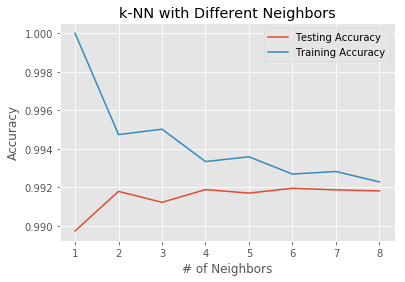

In [32]:
# First Model: k-NN

# Test for different values of k to determine optimal number of neighbors

nb = np.arange(1, 9)
train_ac = np.empty(len(nb))
test_ac = np.empty(len(nb))

for i, k in enumerate(nb):
    
    knn = KNeighborsClassifier(n_neighbors = k)

    knn.fit(X_train, y_train)

    train_ac[i] = knn.score(X_train, y_train)

    test_ac[i] = knn.score(X_test, y_test)

# Produce graph and examine results
plt.title('k-NN with Different Neighbors')
plt.plot(nb, test_ac, label = 'Testing Accuracy')
plt.plot(nb, train_ac, label = 'Training Accuracy')
plt.legend()
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [33]:
# First Model: k-NN Classifier with 4 neighbors

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('k-NN Model Ready')

# Second Model: logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
print('Logistic Regression Model Ready')

# Third Model: Decision Tree

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Decision Tree Model Ready')

# Fourth Model: SVM

clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
print('SVM Model Ready')


k-NN Model Ready
Logistic Regression Model Ready
Decision Tree Model Ready
SVM Model Ready


In [35]:
# Scores for all 4 models
print('Prediction and Training Score for k-NN')
print("Test set predictions:\n {}".format(y_pred))
print(knn.score(X_test, y_test))
print('============================================================')

print('Prediction and Training Score for Logistic Regression')
print("Test set predictions:\n {}".format(y_pred_lr))
print(logreg.score(X_test, y_test))
print('============================================================')

print('Prediction and Training Score for Decision Tree')
print("Test set predictions:\n {}".format(y_pred_tree))
print(tree.score(X_test, y_test))
print('============================================================')

print('Prediction and Training Score for SVM')
print("Test set predictions:\n {}".format(y_pred_svm))
print(clf.score(X_test, y_test))

Prediction and Training Score for k-NN
Test set predictions:
 [False False False ... False False False]
0.9918789022583594
Prediction and Training Score for Logistic Regression
Test set predictions:
 [False False False ... False False False]
0.9926318517178493
Prediction and Training Score for Decision Tree
Test set predictions:
 [False False False ... False False False]
0.9986701152403815
Prediction and Training Score for SVM
Test set predictions:
 [False False False ... False False False]
0.989101789966215


In [36]:
# Accuracy of predictions
print('__________________Accuracy of Predictions__________________')
print("k-NN Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('============================================================')
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))
print('============================================================')
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print('============================================================')
print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

__________________Accuracy of Predictions__________________
k-NN Accuracy: 0.9918789022583594
Logistic Regression Accuracy: 0.9926318517178493
Decision Tree Accuracy: 0.9986701152403815
SVM Accuracy: 0.989101789966215


In [37]:
# Confusion matrix and classification report with F-1 score 

# k-NN
print('=======================================================================')
print('================================k-NN===================================')
print('=======================================================================')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
print(classification_report(y_test, y_pred))

# Logistic Regression
print('=======================================================================')
print('=========================Logistic Regression===========================')
print('=======================================================================')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lr))
print('Classification Report')
print(classification_report(y_test, y_pred_lr))

# Decision Tree
print('=======================================================================')
print('===========================Decision Tree===============================')
print('=======================================================================')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_tree))
print('Classification Report')
print(classification_report(y_test, y_pred_tree))

# SVM
print('=======================================================================')
print('=================================SVM===================================')
print('=======================================================================')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svm))
print('Classification Report')
print(classification_report(y_test, y_pred_svm))

================================k-NN===================================
Confusion Matrix
[[202741    112]
 [  1549    127]]
Classification Report
             precision    recall  f1-score   support

      False       0.99      1.00      1.00    202853
       True       0.53      0.08      0.13      1676

avg / total       0.99      0.99      0.99    204529

=========================Logistic Regression===========================
Confusion Matrix
[[202805     48]
 [  1459    217]]
Classification Report
             precision    recall  f1-score   support

      False       0.99      1.00      1.00    202853
       True       0.82      0.13      0.22      1676

avg / total       0.99      0.99      0.99    204529

===========================Decision Tree===============================
Confusion Matrix
[[202703    150]
 [   122   1554]]
Classification Report
             precision    recall  f1-score   support

      False       1.00      1.00      1.00    202853
       True       0.91   

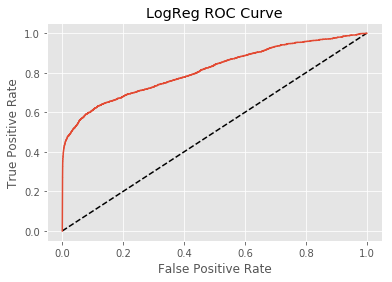

0.8126932141168522

In [38]:
# Plot ROC Curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(fpr, tpr, label='Logistic Regression')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('LogReg ROC Curve')
plt.show();

# The larger the area under our ROC curve the better our model is!

# ROC AUC is another metric that tells the area under the ROC curve. If it is better than 0.5 then our 
# model is better than a random guess

roc_auc_score(y_test, y_pred_prob)

In [39]:
# AUC can also be calculated through cross validation. We can see in the output below that different
# combinations of train-test split in our training file give better results than others.
print('Cross validation scores for the area under the ROC')
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring = 'roc_auc')
print(cv_scores)
print('=======================================================================')
print('Mean score')
print(cv_scores.mean())

Cross validation scores for the area under the ROC
[0.86084789 0.85604591 0.80578156 0.69614374 0.86818447]
Mean score
0.8174007154238611


In [40]:
# Predict labels for the test file: k-NN

print('Predictions for the unseen data.')

y_pred_knn = knn.predict(X_new)
print("k-NN Test set predictions:\n {}".format(y_pred_knn))
print('=======================================================================')

# Predict labels for the test file: Logistic Regression
y_pred_lr = logreg.predict(X_new)
print("Logistic Regression Test set predictions:\n {}".format(y_pred_lr))
print('=======================================================================')

# Predict labels for the test file: Decision Tree
y_pred_tree_2 = tree.predict(X_new)
print("Decision Tree Test set predictions:\n {}".format(y_pred_tree_2))
print('=======================================================================')

# Predict labels for the test file: SVM
y_pred_svm_2 = clf.predict(X_new)
print("SVM Test set predictions:\n {}".format(y_pred_svm_2))

Predictions for the unseen data.
k-NN Test set predictions:
 [False False False ... False False False]
Logistic Regression Test set predictions:
 [False False False ... False False False]
Decision Tree Test set predictions:
 [False False False ... False False False]
SVM Test set predictions:
 [False False False ... False False False]


In [41]:
# This is a large visualization of the decision tree and was only included for illustration
# Might need pydotplus to recreate it

#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#import pydotplus

#dot_data = StringIO()
#export_graphviz(tree, out_file = dot_data,  
                #filled = True, rounded = True,
                #special_characters = True, feature_names = cols_test, #this is the list of columns used for the test set
                #class_names=['False','True'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [42]:
#graph
#graph.write_png('dtree.png')
#Image(graph.create_png())

In [43]:
# List with the predicted labels for the test set
knn_predictions = list(y_pred_knn)
lr_predictions = list(y_pred_lr)
tree_predictions = list(y_pred_tree_2)
svm_predictions = list(y_pred_svm_2)

In [44]:
# Create a new data set with clean test set and check that the lengh is the same for both,
# the data set and the labels list
test_final = test_clean

In [45]:
# Check that the lenghts of the lists matches the the sample size of the test dataframe
print('Length of k-NN Predictions List')
print(len(knn_predictions))
print('=======================================================================')

print('Length of Logistic Regression Predictions List')
print(len(lr_predictions))
print('=======================================================================')

print('Length of Dtree Predictions List')
print(len(tree_predictions))
print('=======================================================================')

print('Length of SVM Predictions List')
print(len(svm_predictions))
print('=======================================================================')

print('Shape of Test DataFrame')
print(test_final.shape);

Length of k-NN Predictions List
170440
Length of Logistic Regression Predictions List
170440
Length of Dtree Predictions List
170440
Length of SVM Predictions List
170440
Shape of Test DataFrame
(170440, 32)


In [46]:
# Add the lists to the data set as a new features
test_final['knn_predicted_office'] = knn_predictions
test_final['lr_predicted_office'] = lr_predictions
test_final['dt_predicted_office'] = tree_predictions
test_final['svm_predicted_office'] = svm_predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [47]:
# Final Output
test_final.head()

block  lot  schooldist  council  zipcode  landuse  easements  lotarea  \
index                                                                           
432027   3361   34        32.0     37.0  11221.0      2.0          0     1958   
97433     654   17        30.0     22.0  11103.0      2.0          0     2396   
408327   3811   12        24.0     30.0  11385.0      1.0          0     1858   
365188  10988   17        29.0     27.0  11412.0      1.0          0     2700   
856787   2619   36        14.0     33.0  11222.0      1.0          0     1333   

        bldgarea  comarea  resarea  officearea  retailarea  garagearea  \
index                                                                    
432027      3789        0     3789           0           0           0   
97433       3200        0     3200           0           0           0   
408327      1248        0     1248           0           0           0   
365188      1648        0     1648           0           0           0   
856787      2298        0     1532           0           0           0   

        strgearea  factryarea  otherarea  numbldgs  numfloors  unitstotal  \
index                                                                       
432027          0           0          0         1        3.0           6   
97433           0           0          0         1        2.0           3   
408327          0           0          0         2        2.0           1   
365188          0           0          0         2        2.5           1   
856787          0           0          0         1        2.0           2   

        lotfront  bldgfront  bldgdepth  proxcode  lottype  assessland  \
index                                                                   
432027     19.58      19.58       45.0       0.0      5.0         878   
97433      25.00      25.00       64.0       3.0      5.0        5700   
408327     18.58      16.00       36.0       2.0      5.0        8652   
365188     27.00      16.00       36.0       1.0      5.0        9480   
856787     16.67      16.67       40.0       3.0      5.0        2846   

        assesstot  builtfar  B_BX  B_MN  B_QN  B_SI  knn_predicted_office  \
index                                                                       
432027      45962      1.94     0     0     0     0                 False   
97433       37203      1.34     0     0     1     0                 False   
408327      24004      0.67     0     0     1     0                 False   
365188      21626      0.61     0     0     1     0                 False   
856787      24616      1.72     0     0     0     0                 False   

        lr_predicted_office  dt_predicted_office  svm_predicted_office  
index                                                                   
432027                False                False                 False  
97433                 False                False                 False  
408327                False                False                 False  
365188                False                False                 False  
856787                False                False                 False

In [48]:
# Percentage of office buildings predicted by each model
first_knn = sum(test_final.knn_predicted_office) / len(test_final.knn_predicted_office)
second_lr = sum(test_final.lr_predicted_office) / len(test_final.lr_predicted_office)
third_dt = sum(test_final.dt_predicted_office) / len(test_final.dt_predicted_office)
fourth_svm = sum(test_final.svm_predicted_office) / len(test_final.svm_predicted_office)

print('Percentage of Office Buildings Predicted by Each Model')
print('--------------k-NN-------------')
print(round(first_knn*100, 4))
print('------Logistic Regression------')
print(round(second_lr*100, 4))
print('---------Decision Tree---------')
print(round(third_dt*100, 4))
print('-------SVM (Highest One)-------')
print(round(fourth_svm*100, 4))

Percentage of Office Buildings Predicted by Each Model
--------------k-NN-------------
0.1261
------Logistic Regression------
0.115
---------Decision Tree---------
0.8085
-------SVM (Highest One)-------
1.414


In [50]:
# Select indexed columns to be added to the master data frame
columns = ['knn_predicted_office', 'lr_predicted_office', 'dt_predicted_office', 'svm_predicted_office']
test_export = test_final[columns]
test_export.head()

knn_predicted_office  lr_predicted_office  dt_predicted_office  \
index                                                                    
432027                 False                False                False   
97433                  False                False                False   
408327                 False                False                False   
365188                 False                False                False   
856787                 False                False                False   

        svm_predicted_office  
index                         
432027                 False  
97433                  False  
408327                 False  
365188                 False  
856787                 False

In [58]:
# Add labeled columns to the master dataframe
final = pd.merge(final_test, test_export, left_index=True, right_index=True)
final.head()

borough  block  lot  schooldist  council  zipcode firecomp  policeprct  \
index                                                                           
432027      BK   3361   34        32.0     37.0  11221.0     L112        83.0   
97433       QN    654   17        30.0     22.0  11103.0     L117       114.0   
408327      QN   3811   12        24.0     30.0  11385.0     E319       104.0   
365188      QN  10988   17        29.0     27.0  11412.0     L150       113.0   
856787      BK   2619   36        14.0     33.0  11222.0     L106        94.0   

        healthcenterdistrict  healtharea  sanitboro  sanitdistrict sanitsub  \
index                                                                         
432027                  34.0      3400.0        3.0            4.0       2B   
97433                   41.0       510.0        4.0            1.0       4E   
408327                  46.0      1810.0        4.0            5.0       4E   
365188                  44.0      3520.0        4.0           12.0       4E   
856787                  30.0       100.0        3.0            1.0       1A   

       zonedist1 zonedist2 zonedist3 zonedist4 overlay1 overlay2 spdist1  \
index                                                                      
432027        R6       NaN       NaN       NaN      NaN      NaN     NaN   
97433        R6B       NaN       NaN       NaN      NaN      NaN     NaN   
408327      R4-1       NaN       NaN       NaN      NaN      NaN     NaN   
365188       R3A       NaN       NaN       NaN      NaN      NaN     NaN   
856787       R6B       NaN       NaN       NaN      NaN      NaN     NaN   

       spdist2  spdist3 ltdheight splitzone  landuse  easements  lotarea  \
index                                                                      
432027     NaN      NaN       NaN         N      2.0          0     1958   
97433      NaN      NaN       NaN         N      2.0          0     2396   
408327     NaN      NaN       NaN         N      1.0          0     1858   
365188     NaN      NaN       NaN         N      1.0          0     2700   
856787     NaN      NaN       NaN         N      1.0          0     1333   

        bldgarea  comarea  resarea  officearea  retailarea  garagearea  \
index                                                                    
432027      3789        0     3789           0           0           0   
97433       3200        0     3200           0           0           0   
408327      1248        0     1248           0           0           0   
365188      1648        0     1648           0           0           0   
856787      2298        0     1532           0           0           0   

        strgearea  factryarea  otherarea  numbldgs  numfloors  unitstotal  \
index                                                                       
432027          0           0          0         1        3.0           6   
97433           0           0          0         1        2.0           3   
408327          0           0          0         2        2.0           1   
365188          0           0          0         2        2.5           1   
856787          0           0          0         1        2.0           2   

        lotfront  lotdepth  bldgfront  bldgdepth  ext  proxcode irrlotcode  \
index                                                                        
432027     19.58    100.00      19.58       45.0  NaN       0.0          N   
97433      25.00     95.83      25.00       64.0  NaN       3.0          N   
408327     18.58    100.00      16.00       36.0    G       2.0          N   
365188     27.00    100.00      16.00       36.0    G       1.0          N   
856787     16.67     80.00      16.67       40.0  NaN       3.0          N   

        lottype  bsmtcode  assessland  assesstot  exemptland  exempttot  \
index                                                                     
432027      5.0       5.0         878      45962           0   

In [59]:
# Export
final.to_csv('test_final.csv')

In [ ]:
# Thank you very much for your time and consideration. I had a lot of fun with this assesstment!
# Ramon